In [397]:
import pandas as pd, numpy as np

In [398]:
train = pd.read_csv(r'C:\Users\Anjana Tiha\OneDrive - The University of Memphis\Programming\data\Titanic\train.csv')
test = pd.read_csv(r'C:\Users\Anjana Tiha\OneDrive - The University of Memphis\Programming\data\Titanic\train.csv')

In [400]:
#feature_cols = ['Pclass','Sex','Age','SibSp', 'Parch','Fare','Cabin','Embarked']
feature_cols = ['Pclass','Sex','Age','SibSp', 'Parch','Fare']
#feature_cols = ['Pclass','Sex','Age','Fare']
#feature_cols = ['Pclass','Sex','Age']
#feature_cols = ['Pclass','Sex']

target_col = 'Survived'

features = train[feature_cols]
target = train[target_col]


features.describe()
target.describe()

# set(features['Fare'])

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [401]:
features = features.fillna(0)
features['Age']=preprocessing.normalize([features['Age']], norm='l2').flatten()
features['Fare'] = preprocessing.normalize([features['Fare']], norm='l2').flatten()

In [402]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(features['Sex'])
features['Sex']=le.transform(features['Sex'])

In [403]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# enc.fit(Y)  
# Y=enc.transform(Y).toarray()
# Y

In [404]:
X = features.values
Y = target

In [405]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn import metrics

    
def model_evaluation(X, Y, splitter, model, report, details):
    accuracy = 0
    f1 = 0
    precision = 0
    recall = 0
    i=0
    if report:
        print("*"*50, " START ", "*"*50)
        print("Spliter Description:")
        print(splitter)
        print("-"*100, "\n")
        print("Model Description:")
        print(model)
        print("-"*100,"\n")
    
    for train_index, test_index in splitter.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # model fitting
        model.fit(X_train, y_train)
        
        # prediction
        predict = model.predict(X_test)

        # evaluation scores
        accuracy_temp = metrics.accuracy_score(y_test, predict)
        precision_temp = metrics.precision_score(y_test, predict, average="micro")
        recall_temp = metrics.recall_score(y_test, predict, average="micro")
        f1_temp = metrics.f1_score(y_test, predict, average="micro")
        hamming_loss = metrics.hamming_loss(y_test, predict)
        
#         precision, recall, thresholds = metrics.precision_recall_curve(y_test, predict)
#         average_precision_score = metrics.average_precision_score(y_test, predict, average="micro")
#         fbeta_score = metrics.fbeta_score(y_test, predict)
#         roc_auc_score = metrics.roc_auc_score(y_test, predict, average="micro")
        
    
        accuracy += accuracy_temp
        precision+=precision_temp
        recall+=recall_temp
        f1+=f1_temp
        
        if details:
            print("*"*25,  " ITERATION - ", i+1, "*"*25)
            #print("TRAIN:", train_index, "TEST:", test_index)
            print("Accuracy Score: ", accuracy_temp)
            print("Precision Score: ", precision_temp)
            print("Recall Score: ", recall_temp)
            print("F1 Score: ", f1_temp)
            print("Hamming Loss: ", hamming_loss)
            print("-"*35)
            print(metrics.classification_report(y_test, predict))
            print("-"*35)
            print("confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predict))
            print("-"*35)
            print("\n")
        
        i+=1
    split_num = splitter.get_n_splits()
    
    accuracy = accuracy/split_num
    precision = precision/split_num
    recall = recall/split_num
    f1 = f1/split_num
    
    if report:
        print("*"*50, " Average For", i+1, " Folds", "*"*50)
        print("\n")
        print("Average Accuracy Score: ", accuracy)
        print("Average pPrecision Score: ", precision)
        print("Average Recall Score: ", recall)
        print("Average F1 Score:", f1)
        print("\n")
        print("*"*50, " END ", "*"*50)
    
    
    
    return accuracy, precision, recall, f1


In [430]:
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomTreesEmbedding, RandomForestClassifier, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)


classifiers = {
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BernoulliNB": BernoulliNB(),
#     "BernoulliRBM": BernoulliRBM(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "GaussianMixture": GaussianMixture(),
    "GaussianNB": GaussianNB(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
#     "KDTree": KDTree(),
    "KNeighborsClassifier": KNeighborsClassifier(3),
    "LogisticRegression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "MLPClassifier": MLPClassifier(),
    "MultinomialNB": MultinomialNB(),
#     "NearestNeighbors": NearestNeighbors(),
    "NuSVC": NuSVC(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC Linear": SVC(kernel="linear", C=0.025),
    "SVC": SVC(),
    "SVC Gamma": SVC(gamma=2, C=1)
#     VotingClassifier: VotingClassifier(),
}
    
    
splitter = sss
report = None
details = 1


evaluation = {}

for name in classifiers:
    evaluation_temp = []
    accuracy, precision, recall, f1 = model_evaluation(X, Y, splitter, classifiers[name], report=None, details=None)
    evaluation_temp.append(accuracy)
    evaluation_temp.append(precision)
    evaluation_temp.append(recall)
    evaluation_temp.append(f1)
    evaluation[name] = evaluation_temp
    
for name in classifiers:
    print(name, [i for i in evaluation[name]])
    

rows_list = []
for name in evaluation:
    rows_list.append([name]+evaluation[name])
                           
df = pd.DataFrame(rows_list, columns=['model', 'accuracy', 'precision', 'recall', 'f1']) 


AdaBoostClassifier [0.7829596412556054, 0.7829596412556054, 0.7829596412556054, 0.7829596412556055]
BernoulliNB [0.788340807174888, 0.788340807174888, 0.788340807174888, 0.7883408071748879]
DecisionTreeClassifier [0.7659192825112108, 0.7659192825112108, 0.7659192825112108, 0.7659192825112108]
ExtraTreesClassifier [0.793273542600897, 0.793273542600897, 0.793273542600897, 0.793273542600897]
GaussianMixture [0.6165919282511211, 0.6165919282511211, 0.6165919282511211, 0.6165919282511211]
GaussianNB [0.7914798206278026, 0.7914798206278026, 0.7914798206278026, 0.7914798206278026]
GaussianProcessClassifier [0.7986547085201794, 0.7986547085201794, 0.7986547085201794, 0.7986547085201793]
GradientBoostingClassifier [0.8112107623318385, 0.8112107623318385, 0.8112107623318385, 0.8112107623318385]
KNeighborsClassifier [0.7856502242152467, 0.7856502242152467, 0.7856502242152467, 0.7856502242152466]
LogisticRegression [0.799103139013453, 0.799103139013453, 0.799103139013453, 0.799103139013453]
Linear

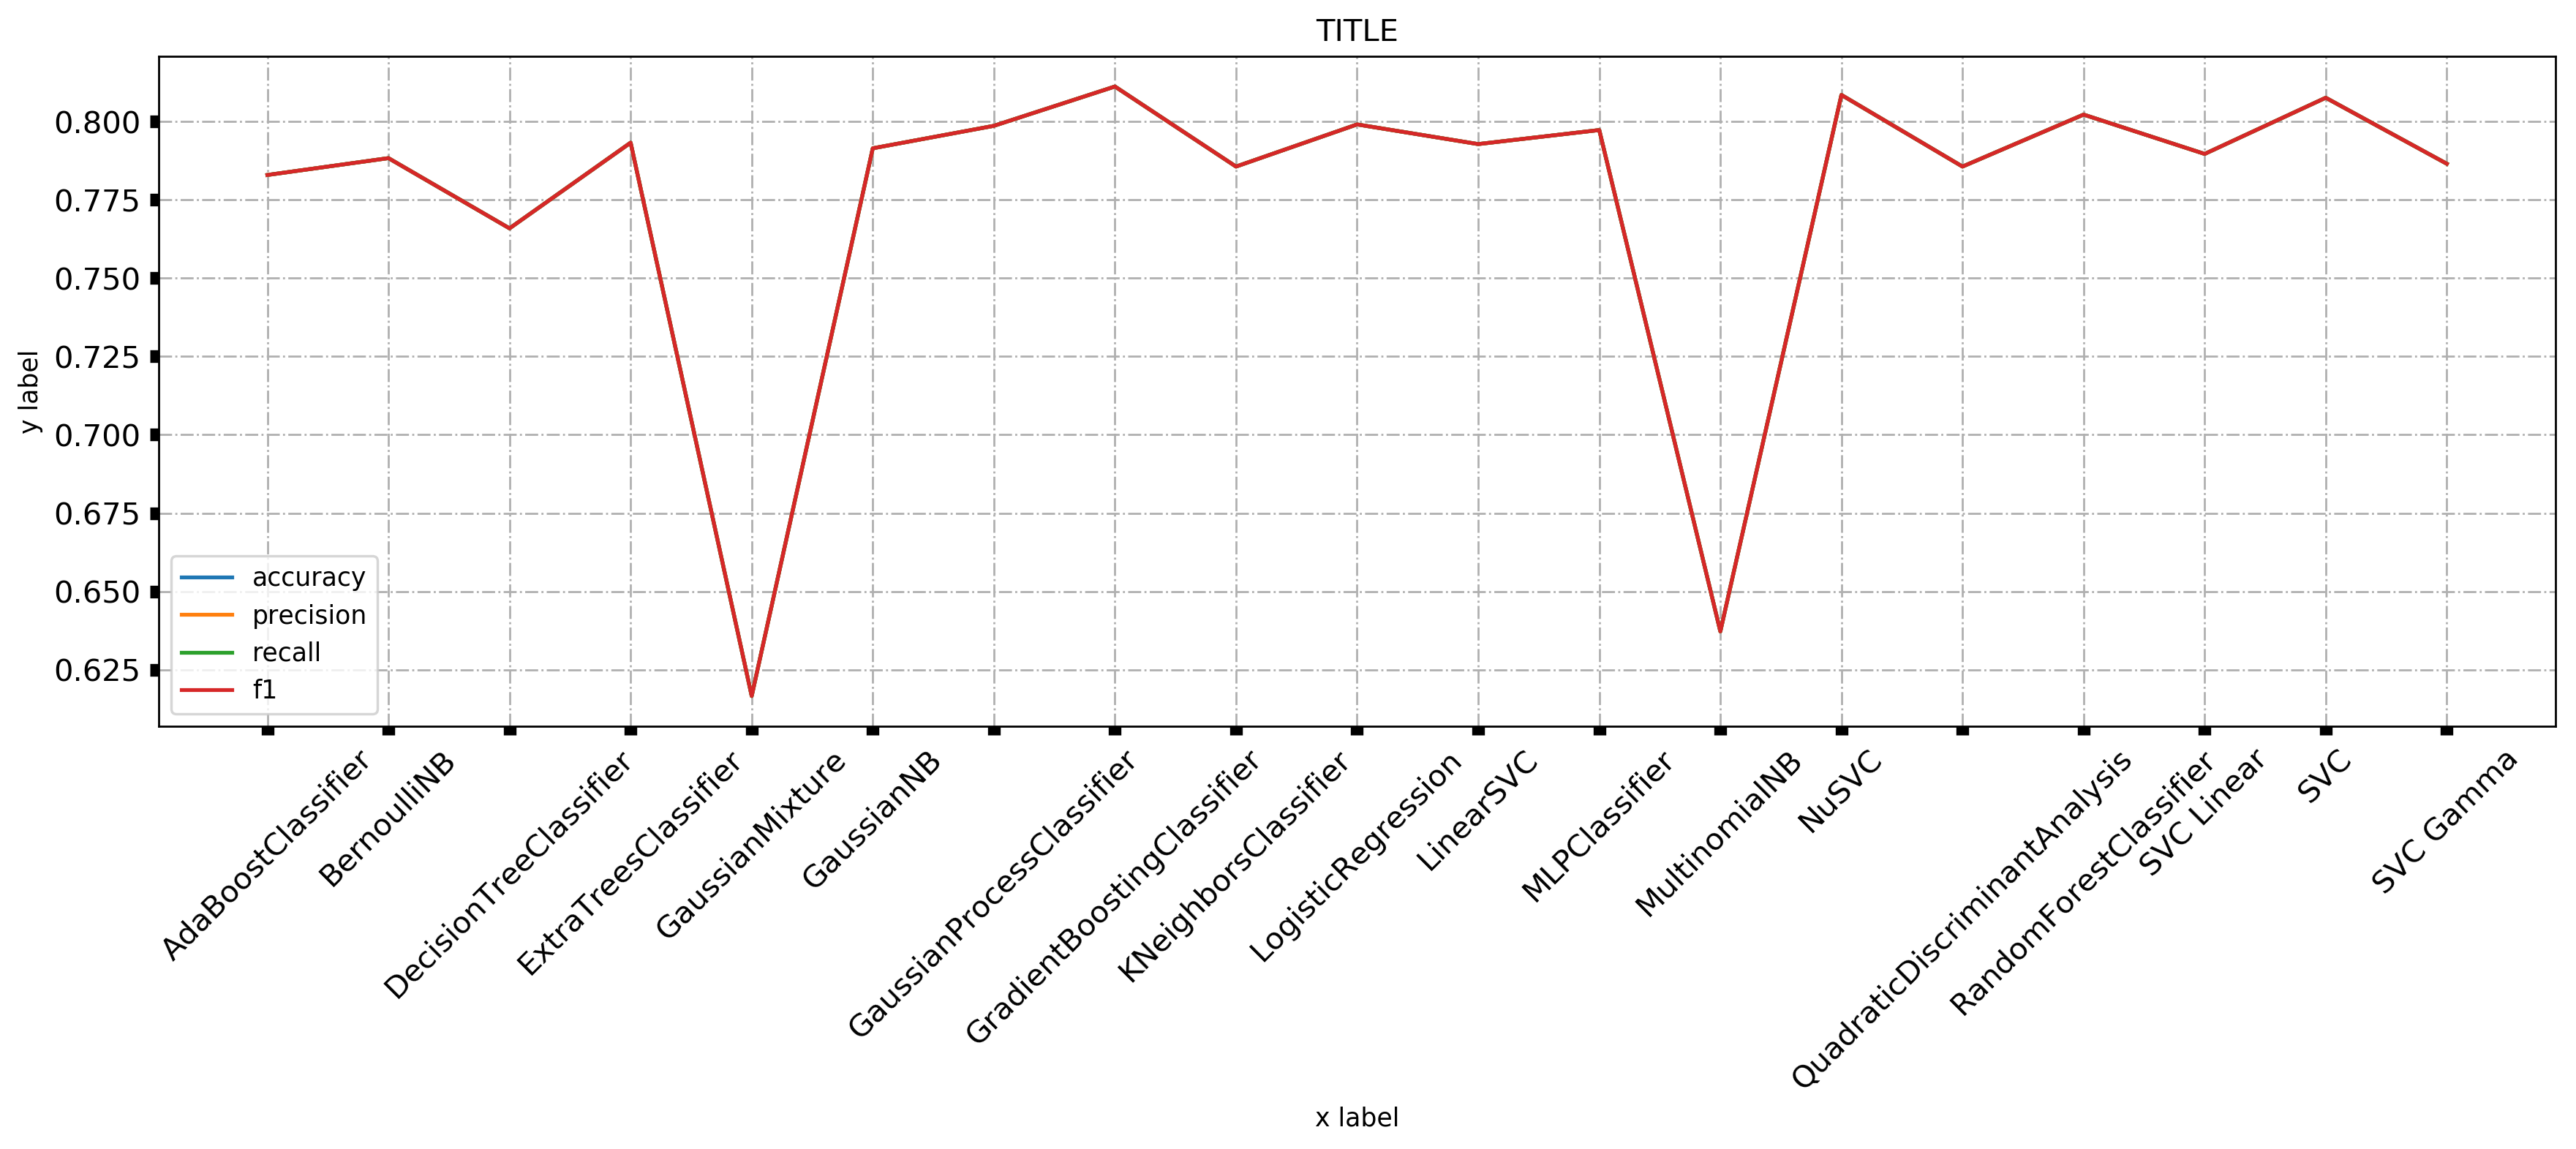

In [431]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(num=None, figsize=(14, 6), dpi=250)

labels= ['accuracy', 'precision', 'recall', 'f1']
ax = plt.subplot(111)

for n in range(0,4):
    plt.plot([name for name in evaluation],[evaluation[name][n] for name in evaluation], label = labels[n])

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.xticks(rotation=45)
# leg.get_frame().set_alpha(0.5)
plt.legend()
ax.tick_params(labelsize='large', width=5)
ax.grid(True, linestyle='-.')

plt.tight_layout()
plt.xlabel('x label')
plt.ylabel('y label')

plt.title("TITLE")
plt.show()





In [444]:
df

,model,accuracy,precision,recall,f1
0,AdaBoostClassifier,0.782960,0.782960,0.782960,0.782960
1,BernoulliNB,0.788341,0.788341,0.788341,0.788341
2,DecisionTreeClassifier,0.765919,0.765919,0.765919,0.765919
3,ExtraTreesClassifier,0.793274,0.793274,0.793274,0.793274
4,GaussianMixture,0.616592,0.616592,0.616592,0.616592
5,GaussianNB,0.791480,0.791480,0.791480,0.791480
6,GaussianProcessClassifier,0.798655,0.798655,0.798655,0.798655
7,GradientBoostingClassifier,0.811211,0.811211,0.811211,0.811211
8,KNeighborsClassifier,0.785650,0.785650,0.785650,0.785650
9,LogisticRegression,0.799103,0.799103,0.799103,0.799103
